In [1]:
import sys
sys.path.insert(1, './src')

import numpy as np
import random
import argparse
import matplotlib
import matplotlib.pyplot as plt
import pickle

Text(0, 0.5, 'Prediction accuracy')

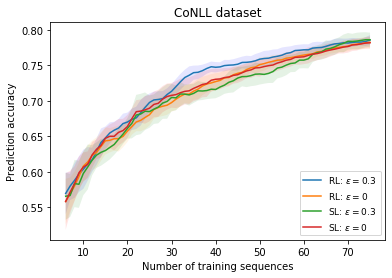

In [2]:
### compare strategies with mean and variance

with open("./results_mp/conllnumembed_TrellisCNN_75bgt_5init_10trainEp_10testEp.mp", "rb") as in_file:
    (res_tr1, res_ts1) = pickle.load(in_file)
    acc = np.array([res[5] for res in res_ts1])
    cost = res_ts1[0][1]
    mean1 = np.mean(acc, axis=0)
    var1 = np.std(acc, axis=0)
    
with open("./results_mp/conllnumembed_TrellisCNN_75bgt_5init_20trainEp_10testEp.mp", "rb") as in_file:
    (res_tr2, res_ts2) = pickle.load(in_file)
    acc = np.array([res[5] for res in res_ts2])
    mean2 = np.mean(acc, axis=0)
    var2 = np.std(acc, axis=0)

with open("./results_mp/conllnumembed_TrellisSupervised_75bgt_5init_20trainEp_5testEp.mp", "rb") as in_file:
    (res_tr3, res_ts3) = pickle.load(in_file)
    acc = np.array([res[5] for res in res_ts3])
    mean3 = np.mean(acc, axis=0)
    var3 = np.std(acc, axis=0)

with open("./results_mp/conllnumembed_TrellisSupervised_75bgt_5init_20trainEp_10testEp.mp", "rb") as in_file:
    (res_tr4, res_ts4) = pickle.load(in_file)
    acc = np.array([res[5] for res in res_ts4])
    mean4 = np.mean(acc, axis=0)
    var4 = np.std(acc, axis=0)
    
plt.plot(cost, mean1,
         cost, mean2,
         cost, mean3,
         cost, mean4,)
#          cost, mean5,)

plt.fill_between(cost, mean1+var1, mean1-var1, facecolor='blue', alpha=0.1)
plt.fill_between(cost, mean2+var2, mean2-var2, facecolor='orange', alpha=0.1)
plt.fill_between(cost, mean3+var3, mean3-var3, facecolor='green', alpha=0.1)
plt.fill_between(cost, mean4+var4, mean4-var4, facecolor='red', alpha=0.1)
# plt.fill_between(cost, mean5+var5, mean5-var5, facecolor='green', alpha=0.1)
plt.legend(['RL: $\epsilon=0.3$', 'RL: $\epsilon=0$', 'SL: $\epsilon=0.3$', 'SL: $\epsilon=0$'], loc='lower right', fancybox=True, fontsize = 9)
# plt.xlim(200, 600)

plt.title('CoNLL dataset')
plt.xlabel('Number of training sequences')
plt.ylabel('Prediction accuracy')
# plt.savefig('./results/sod.png', bbox_inches='tight')


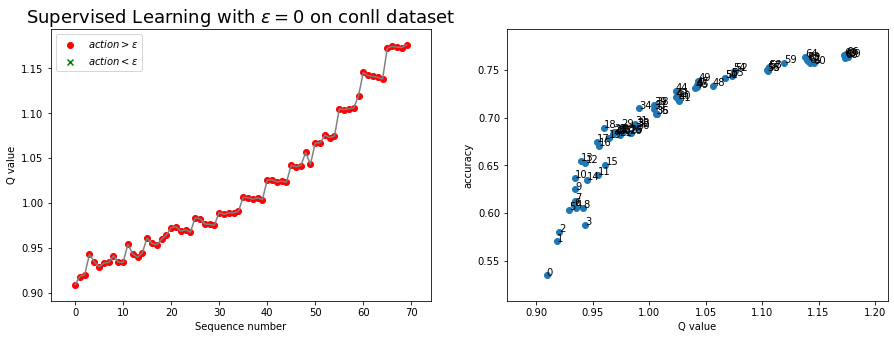

In [4]:
### draw q-value and true reward (accuracy)

(pid, res_cost, res_explore, res_qvalue, res_reward, res_acc_test, res_acc_valid) = res_ts4[0]

qvalue_list = res_qvalue
action_mark_list = res_explore
prob_list = res_reward
SOURCE = 'conll'

# ======================================== sanity check =====================================================
x = range(len(qvalue_list))

fig, axes = plt.subplots(ncols=2, nrows=1)
ax = axes.flatten()

ax[0].plot(x, qvalue_list, color='0.5')
x2 = []
y2 = []
for i in x:
    if action_mark_list[i] == 1:
        x2.append(i)
        y2.append(qvalue_list[i])
l1 = ax[0].scatter(x2, y2, color='r', marker='o')
x2 = []
y2 = []
for i in x:
    if action_mark_list[i] == 0:
        x2.append(i)
        y2.append(qvalue_list[i])
l2 = ax[0].scatter(x2, y2, color='g', marker='x')
ax[0].legend((l1,l2),
           ('$action > \\epsilon$', '$action < \\epsilon$'))

ax[0].set_title('Supervised Learning with $\epsilon=0$ on {} dataset'.format(SOURCE), fontsize=18)
# plt.xlim(0, 20)
ax[0].set_ylabel('Q value')
ax[0].set_xlabel('Sequence number')

# print (qvalue_list)
ax[1].scatter(qvalue_list, prob_list)
for i in range(len(qvalue_list)):
    ax[1].annotate(i, (qvalue_list[i], prob_list[i]))
ax[1].set_xlabel('Q value')
ax[1].set_ylabel('accuracy')
plt.subplots_adjust(wspace=0.2)
fig.set_size_inches(15,5)
# plt.show()
# plt.savefig(filename + '_check.png')

In [3]:
import arxivscraper
scraper = arxivscraper.Scraper(category='stats', date_from='2017-05-27',date_until='2017-06-07')

In [4]:
output = scraper.scrape()

http://export.arxiv.org/oai2?verb=ListRecords&from=2017-05-27&until=2017-06-07&metadataPrefix=arXiv&set=stats
fetching up to  1000 records...
